# MÓDULO

Os módulos na linguagem Julia são `workspace` de variáveis separadas, isto é, eles introduzem um novo escopo global. Isso é interessnte e serve para separar as definições de variáveis de outros módulos, e dessa forma evitar conflitos de nome. Dentro de um módulo é possível controlar quais nomes de outros módulos são visíveis (por meio de importação) e especificar quais de seus nomes pretendem ser públicos (por meio da exportação). Um bom exemplo de conflito de nomes ocorre quando usamos os pacotes gráficos Pyplot e GR. Ambos possuem a função `plot` para gerar um gráfico e quando usamos `plot(vetor_x, vetor_y)` `Julia` informa que há um conflito com relação ao nome. Com o uso de um módulo definindo corretamente a função `plot` para os pacotes, é possivel utilza-los simultaneamente sem conflito. Além disso um modulo é o "embrião" de um pacote personalizado.

In [1]:
# importando dois pacotes gráficos
using GR, PyPlot

In [2]:
# definindo um vetor e uma função
x = linspace(0, 2*pi, 30)
f(x) = sin(x)

f (generic function with 1 method)

In [3]:
# executando a função plot para gerar o gráfico
plot(x, f(x))

LoadError: [91mUndefVarError: plot not defined[39m

Veja que ocorreu erro com o seguinte aviso: 

> `WARNING: both PyPlot and GR export "plot"; uses of it in module Main must be qualified`.

Isto acontece devido os pacotes apresentare uma função com o mesmo nome e aí Julia não sabe qual pacote deverá utilizar. Para resolver esse problema, criaremos um módulo que permite executar a função `plot` de acordo com o pacote passado como argumento de uma função.

**Anatomia de um Módulo**


```julia
# -----------------------------------------------------#
module NomeModule

global variável = valor

const constantes

using Pacotes

import ou importall nome_pacote

export função1_módulo, função2_módulo,...

include("script.jl")

type MeuTipo
    #
end

function função1_módulo
    # código
end

end
# -----------------------------------------------------#

```
- `module`: É usado para trazer outro módulo para o módulo atual
- `global`: Define variáveis globais
- `const`: Define uma constante
- `using`: Permite usar um pacote (PyPlot, SymPy, Calculus, etc) 
- `import ou importall`: É usado para trazer tipos específicos/funções/variáveis de outros módulos para o módulo; atual.
- `export`: Exporta as funções definidas no módulo;
- `include`: permite incluir scripts e todas as funções existentes neles;
- `type`: Permite definir um tipo de dado específico;
- `função1_módulo`: Função definida pelo desenvolvedor.

**Exemplo de um Módulo para resolver conflito de gráfico**

In [26]:
module Grafico

# Carrega os pacotes gráficos
using PyPlot
using GR

# Função exportada
export plot_grafico

# Função para gerenciar os pacotes
function plot_grafico(x, y, pacote)
    
    if pacote == "PyPlot"
        println("Usando o PyPlot")
        return fig = PyPlot.figure(figsize = (4,3)), PyPlot.plot(x , y);
        
    elseif pacote == "GR"
        println("Usando o GR")
        return GR.plot(x , y)
    end
    
end # fim função

end # fim modulo

Grafico

Uma vez criado o módulo e executado, basta agora utilizá-lo. 

In [27]:
using Grafico

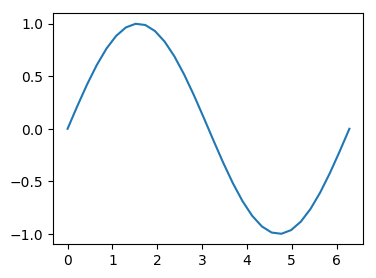

Usando o PyPlot


(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f3bb5605eb8>), PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7f3bb38b0eb8>])

In [28]:
# Plotar a função f(x) com o pacote PyPlot
plot_grafico(x, f.(x), "PyPlot")

In [30]:
# Plotar a função f(x) com o pacote GR
plot_grafico(x, f.(x), "GR")

**Módulo xx**

## BIBLIOGRAFIA

* Sebesta, Robert W.Conceitos de linguagens de programação [recurso eletrônico] /Robert W. Sebesta; tradução técnica: Eduardo Kessler Piveta. – 9. ed. – Dados eletrônicos. – Porto Alegre : Bookman, 2011.

* Vieira, Francisco. Programação Funcional usando Haskell. Teresina, 2005. 

